In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/cover_type_updated_soil features.csv')
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type39,Soil_Type40,Cover_Type,Inceptisols,Mollisols,Spodosols,Alfisols,Entisols,Unknown,Histosols
0,0,2596,51,3,258,0,510,221,232,148,...,0,0,5,1,0,0,0,0,0,0
1,1,2590,56,2,212,-6,390,220,235,151,...,0,0,5,1,0,0,0,0,0,0
2,2,2804,139,9,268,65,3180,234,238,135,...,0,0,2,0,0,0,0,1,0,0
3,3,2785,155,18,242,118,3090,238,238,122,...,0,0,2,1,0,0,0,0,0,0
4,4,2595,45,2,153,-1,391,220,234,150,...,0,0,5,1,0,0,0,0,0,0


In [ ]:
df['Horizontal_Distance_To_Fire_Points'].describe()

count    581012.000000
mean       1980.291226
std        1324.195210
min           0.000000
25%        1024.000000
50%        1710.000000
75%        2550.000000
max        7173.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64

In [ ]:
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7f720e787160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f720e7876a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f720e786ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f720e787be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f720e787e80>],
 'means': []}

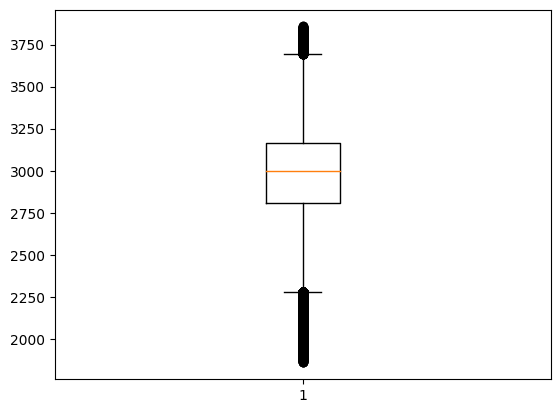

In [ ]:
plt.boxplot(df['Elevation'])

In [ ]:
df['Elevation'].describe()

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64

<Axes: xlabel='Elevation', ylabel='Density'>

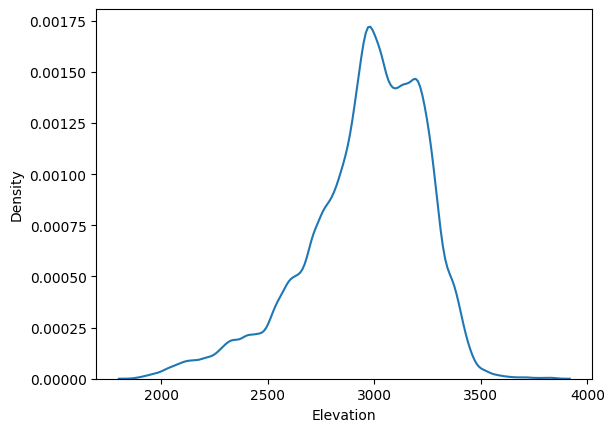

In [ ]:
import seaborn as sns
sns.kdeplot(df['Elevation'])

<Axes: >

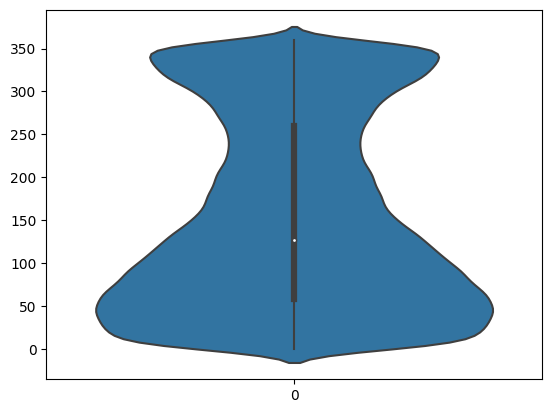

In [ ]:
sns.violinplot(df['Aspect'])

<Axes: xlabel='Aspect', ylabel='Density'>

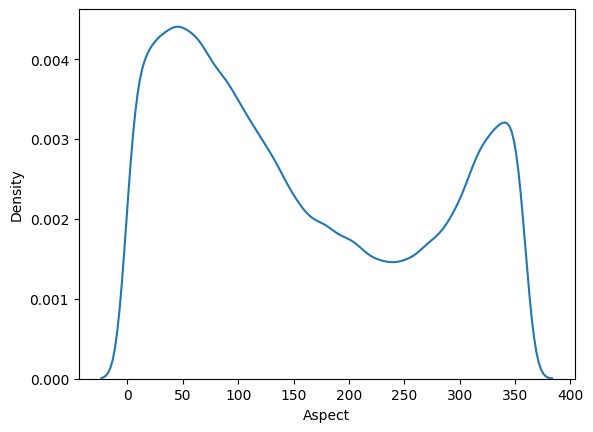

In [ ]:
import seaborn as sns
sns.kdeplot(df['Aspect'])

In [ ]:
df['Aspect'].shape

(581012,)

In [ ]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df['Aspect'].values.reshape(-1, 1))

# Generate a unimodal distribution using the means and standard deviations of the component distributions
means, stds = gmm.means_, np.sqrt(gmm.covariances_).reshape(-1)
unimodal_data = norm.rvs(loc=means.mean(), scale=stds.mean(), size=581012)

(array([6.10000e+01, 1.82700e+03, 1.98850e+04, 9.49260e+04, 1.96376e+05,
        1.81071e+05, 7.28140e+04, 1.29920e+04, 1.02000e+03, 4.00000e+01]),
 array([-63.39305477, -13.21667752,  36.95969972,  87.13607697,
        137.31245421, 187.48883146, 237.6652087 , 287.84158595,
        338.01796319, 388.19434044, 438.37071768]),
 <BarContainer object of 10 artists>)

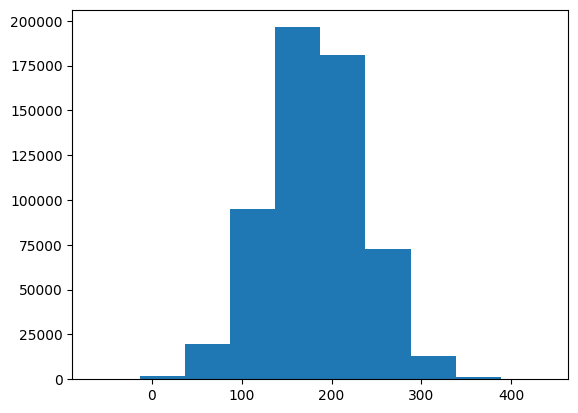

In [ ]:
plt.hist(unimodal_data)

In [ ]:
unimodal_data.shape

(581012,)

In [ ]:
df['Aspect_unimodal'] = unimodal_data

In [ ]:
df['Aspect_unimodal']

0         120.413596
1         164.098101
2         204.846963
3         122.718720
4         123.665486
             ...    
581007    233.770285
581008    136.745762
581009    149.865564
581010    279.516729
581011    201.811664
Name: Aspect_unimodal, Length: 581012, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
def standard_scaling(df,column_list):
  for i in column_list:
    tf = StandardScaler()
    df[i] = tf.fit_transform(df[i].values.reshape(-1,1))
  return df

In [ ]:
df = standard_scaling(df,['Aspect_unimodal'])

(array([6.10000e+01, 1.82700e+03, 1.98850e+04, 9.49260e+04, 1.96376e+05,
        1.81071e+05, 7.28140e+04, 1.29920e+04, 1.02000e+03, 4.00000e+01]),
 array([-4.59541248, -3.65647274, -2.717533  , -1.77859326, -0.83965352,
         0.09928622,  1.03822596,  1.9771657 ,  2.91610544,  3.85504518,
         4.79398492]),
 <BarContainer object of 10 artists>)

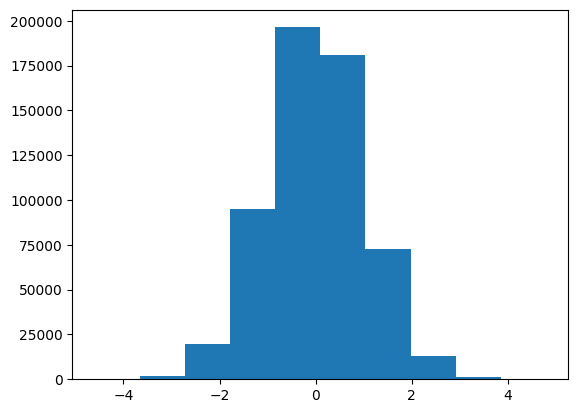

In [ ]:
plt.hist(df['Aspect_unimodal'])

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# from sklearn.mixture import GaussianMixture

# # Generate some bimodal data
# np.random.seed(42)
# data = np.concatenate([np.random.normal(0, 1, 1000), np.random.normal(5, 2, 1000)])

# # Fit a mixture model to the data
# gmm = GaussianMixture(n_components=2, random_state=42)
# gmm.fit(data.reshape(-1, 1))

# # Generate a unimodal distribution using the means and standard deviations of the component distributions
# means, stds = gmm.means_, np.sqrt(gmm.covariances_).reshape(-1)
# unimodal_data = norm.rvs(loc=means.mean(), scale=stds.mean(), size=1000)

# # Plot the original data, the mixture model, and the unimodal distribution
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# axs[0].hist(data, bins=50)
# axs[0].set_title("Original Data")
# axs[1].hist(data, bins=50, alpha=0.5)
# x = np.linspace(-10, 20, 1000)
# axs[1].plot(x, gmm.predict_proba(x.reshape(-1, 1))[:, 0]*1000, label="Component 1")
# axs[1].plot(x, gmm.predict_proba(x.reshape(-1, 1))[:, 1]*1000, label="Component 2")
# axs[1].set_title("Mixture Model")
# axs[1].legend()
# axs[2].hist(unimodal_data, bins=50)
# axs[2].set_title("Unimodal Data")
# plt.show()

<Axes: xlabel='Slope', ylabel='Density'>

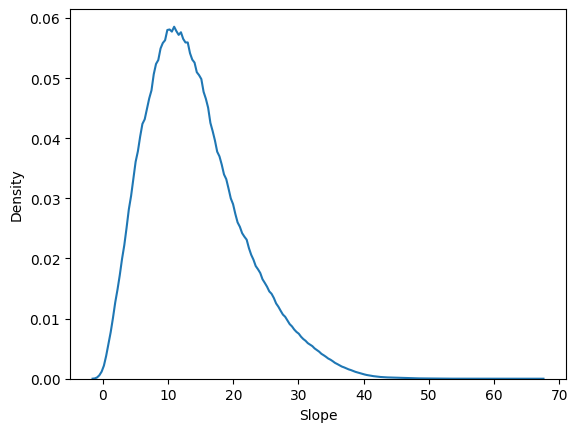

In [ ]:
import seaborn as sns
sns.kdeplot(df['Slope'])

<Axes: >

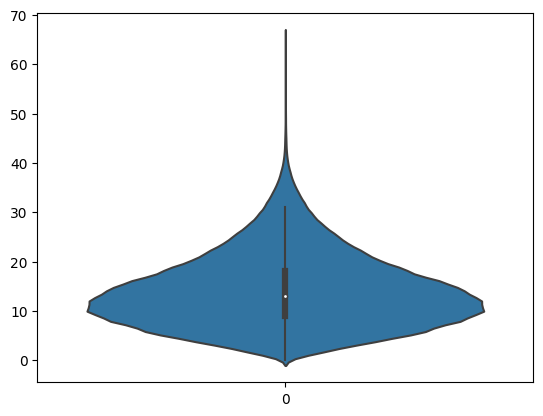

In [ ]:
sns.violinplot(df['Slope'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Slope', ylabel='Density'>

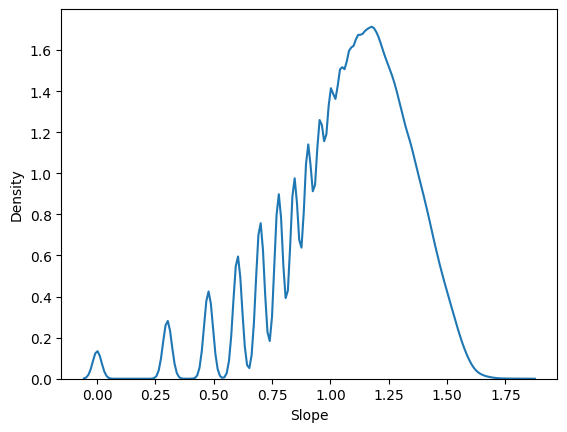

In [ ]:
xx = np.log10(df['Slope'])
sns.kdeplot(xx)

<Axes: xlabel='Horizontal_Distance_To_Hydrology', ylabel='Density'>

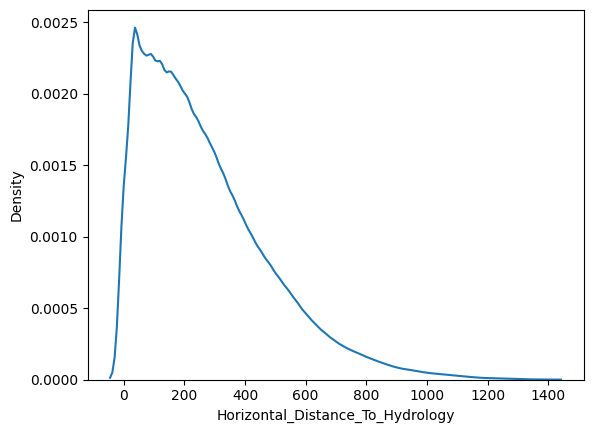

In [ ]:
import seaborn as sns
sns.kdeplot(df['Horizontal_Distance_To_Hydrology'])

<Axes: xlabel='Vertical_Distance_To_Hydrology', ylabel='Density'>

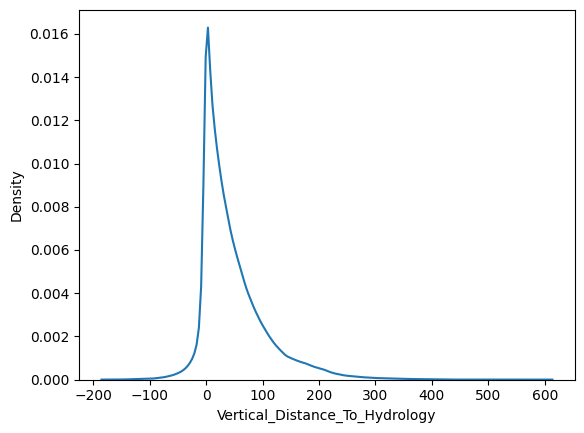

In [ ]:
import seaborn as sns
sns.kdeplot(df['Vertical_Distance_To_Hydrology'])

In [ ]:
df = standard_scaling(df,['Vertical_Distance_To_Hydrology'])

<Axes: xlabel='Elevation', ylabel='Density'>

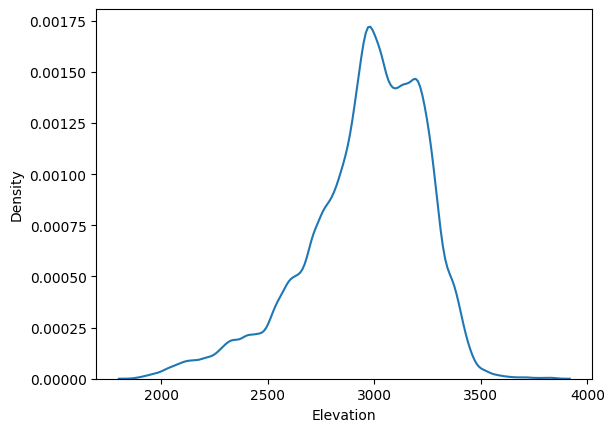

In [ ]:
import seaborn as sns
sns.kdeplot(df['Elevation'])

In [ ]:
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Inceptisols,Mollisols,Spodosols,Alfisols,Entisols,Unknown,Histosols,Aspect_unimodal
0,0,2596,51,3,258,-0.796273,510,221,232,148,...,0,5,1,0,0,0,0,0,0,-1.155878
1,1,2590,56,2,212,-0.899197,390,220,235,151,...,0,5,1,0,0,0,0,0,0,-0.338419
2,2,2804,139,9,268,0.318742,3180,234,238,135,...,0,2,0,0,0,0,1,0,0,0.424105
3,3,2785,155,18,242,1.227908,3090,238,238,122,...,0,2,1,0,0,0,0,0,0,-1.112743
4,4,2595,45,2,153,-0.813427,391,220,234,150,...,0,5,1,0,0,0,0,0,0,-1.095026


<Axes: xlabel='Horizontal_Distance_To_Hydrology', ylabel='Density'>

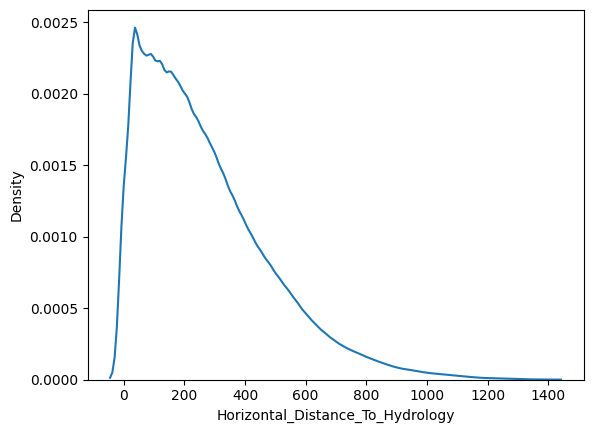

In [ ]:
sns.kdeplot((df['Horizontal_Distance_To_Hydrology']))

In [ ]:
# df['Horizontal_Distance_To_Roadways'] = df['Horizontal_Distance_To_Roadways']+0.1
# df['Horizontal_Distance_To_Fire_Points'] = df['Horizontal_Distance_To_Fire_Points']+0.1

In [ ]:
for i in range(0,len(df['Horizontal_Distance_To_Roadways'])):
  if df['Horizontal_Distance_To_Roadways'][i] == 0:
    df['Horizontal_Distance_To_Roadways'][i] = 0.1

<ipython-input-29-41d369b540d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Horizontal_Distance_To_Roadways'][i] = 0.1


In [ ]:
for i in range(0,len(df['Horizontal_Distance_To_Fire_Points'])):
  if df['Horizontal_Distance_To_Fire_Points'][i] == 0.000000:
    df['Horizontal_Distance_To_Fire_Points'][i] = 0.1

<ipython-input-30-9e6d83ef634a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Horizontal_Distance_To_Fire_Points'][i] = 0.1


In [ ]:
df['Horizontal_Distance_To_Fire_Points'].describe()

count    581012.000000
mean       1980.291235
std        1324.195197
min           0.100000
25%        1024.000000
50%        1710.000000
75%        2550.000000
max        7173.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64

In [ ]:
def log_transform(df,feature_list):
  for i in feature_list:
    df[i] = np.log10(df[i])
  return df

In [ ]:
df = log_transform(df,['Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points'])

<Axes: xlabel='Horizontal_Distance_To_Roadways', ylabel='Density'>

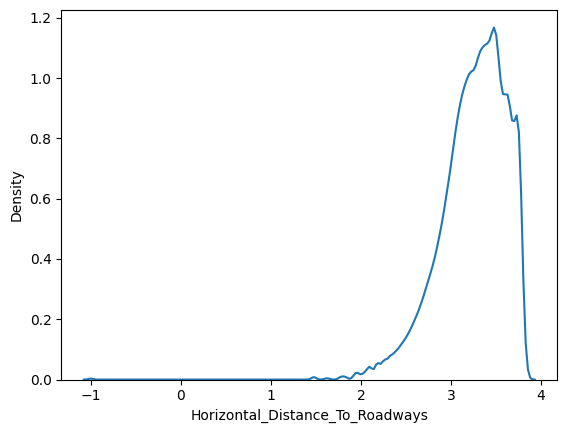

In [ ]:
sns.kdeplot((df['Horizontal_Distance_To_Roadways']))

In [ ]:
from sklearn.preprocessing import StandardScaler
def standard_scaling(dfa,column_list):
  for i in column_list:
    tf = StandardScaler()
    dfa[i] = tf.fit_transform(dfa[i].values.reshape(-1,1))
  return dfa

In [ ]:
df = standard_scaling(df,['Horizontal_Distance_To_Hydrology','Elevation','Slope','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm'])

In [ ]:
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type40,Cover_Type,Inceptisols,Mollisols,Spodosols,Alfisols,Entisols,Unknown,Histosols,Aspect_unimodal
0,0,-1.297805,51,-1.482820,-0.053767,-0.796273,2.707570,0.330743,0.439143,0.142960,...,0,5,1,0,0,0,0,0,0,-1.155878
1,1,-1.319235,56,-1.616363,-0.270188,-0.899197,2.591065,0.293388,0.590899,0.221342,...,0,5,1,0,0,0,0,0,0,-0.338419
2,2,-0.554907,139,-0.681563,-0.006719,0.318742,3.502427,0.816364,0.742654,-0.196691,...,0,2,0,0,0,0,1,0,0,0.424105
3,3,-0.622768,155,0.520322,-0.129044,1.227908,3.489958,0.965786,0.742654,-0.536343,...,0,2,1,0,0,0,0,0,0,-1.112743
4,4,-1.301377,45,-1.616363,-0.547771,-0.813427,2.592177,0.293388,0.540313,0.195215,...,0,5,1,0,0,0,0,0,0,-1.095026


In [ ]:
df = standard_scaling(df,['Aspect'])

In [ ]:
df.columns

Index(['Unnamed: 0', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39'